# Logistic Regression



Below mentioned are the steps to be followed:

1. Load the data
2. Data Preparation - Normalisation or Rescaling, train-test Split
3. Training the Model
4. Prediction
5. Evaluation



## Loading the Data

In [1]:
import pandas as pd

df = pd.read_csv('data/Iris.csv')

df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [2]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Data Preparation - Standardization

In [3]:
target = df['Species']
data = df.drop("Species", axis=1)

In [4]:
data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [5]:
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [6]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [7]:
print(data.shape)
print(target.shape)

(150, 4)
(150,)


In [8]:
# # Data-preprocessing: Standardizing the data

# from sklearn.preprocessing import StandardScaler
# standardized_data = StandardScaler().fit_transform(data)
# print(standardized_data.shape)


## Data Preparation - Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                   target, 
                                                   test_size = 0.25, 
                                                   random_state = 0)

## Training

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## Predictions

In [11]:
y_test_pred = classifier.predict(X_test)

In [12]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

Actual        Predicted
114   Iris-virginica   Iris-virginica
62   Iris-versicolor  Iris-versicolor
33       Iris-setosa      Iris-setosa
107   Iris-virginica   Iris-virginica
7        Iris-setosa      Iris-setosa
100   Iris-virginica   Iris-virginica
40       Iris-setosa      Iris-setosa
86   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor
71   Iris-versicolor  Iris-versicolor
134   Iris-virginica   Iris-virginica
51   Iris-versicolor  Iris-versicolor
73   Iris-versicolor  Iris-versicolor
54   Iris-versicolor  Iris-versicolor
63   Iris-versicolor  Iris-versicolor
37       Iris-setosa      Iris-setosa
78   Iris-versicolor  Iris-versicolor
90   Iris-versicolor  Iris-versicolor
45       Iris-setosa      Iris-setosa
16       Iris-setosa      Iris-setosa
121   Iris-virginica   Iris-virginica
66   Iris-versicolor  Iris-versicolor
24       Iris-setosa      Iris-setosa
8        Iris-setosa      Iris-setosa
126   Iris-virginica   Iris-virginica
22       Iris-setosa      Iris-setosa
44       Iris-setosa      Iris-setosa
97   Iris-versicolor  Iris-versicolor
93   Iris-versicolor  Iris-versicolor
26       Iris-setosa      Iris-setosa
137   Iris-virginica   Iris-virginica
84   Iris-versicolor  Iris-versicolor
27       Iris-setosa      Iris-setosa
127   Iris-virginica   Iris-virginica
132   Iris-virginica   Iris-virginica
59   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
83   Iris-versicolor   Iris-virginica

In [13]:
temp_df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [14]:
temp_df.loc[temp_df.Actual != temp_df.Predicted, :]

Actual       Predicted
83  Iris-versicolor  Iris-virginica

## Measuring Performance

In [15]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

# Let's now see how to do it like a BOSS!

Have a look at the steps that are followed:
1. Load the data
2. Analyse the data
3. Data Preparation
4. Training
5. Predictions
6. Evaluation

## Load the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/Iris.csv')

df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

## Data Analysis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

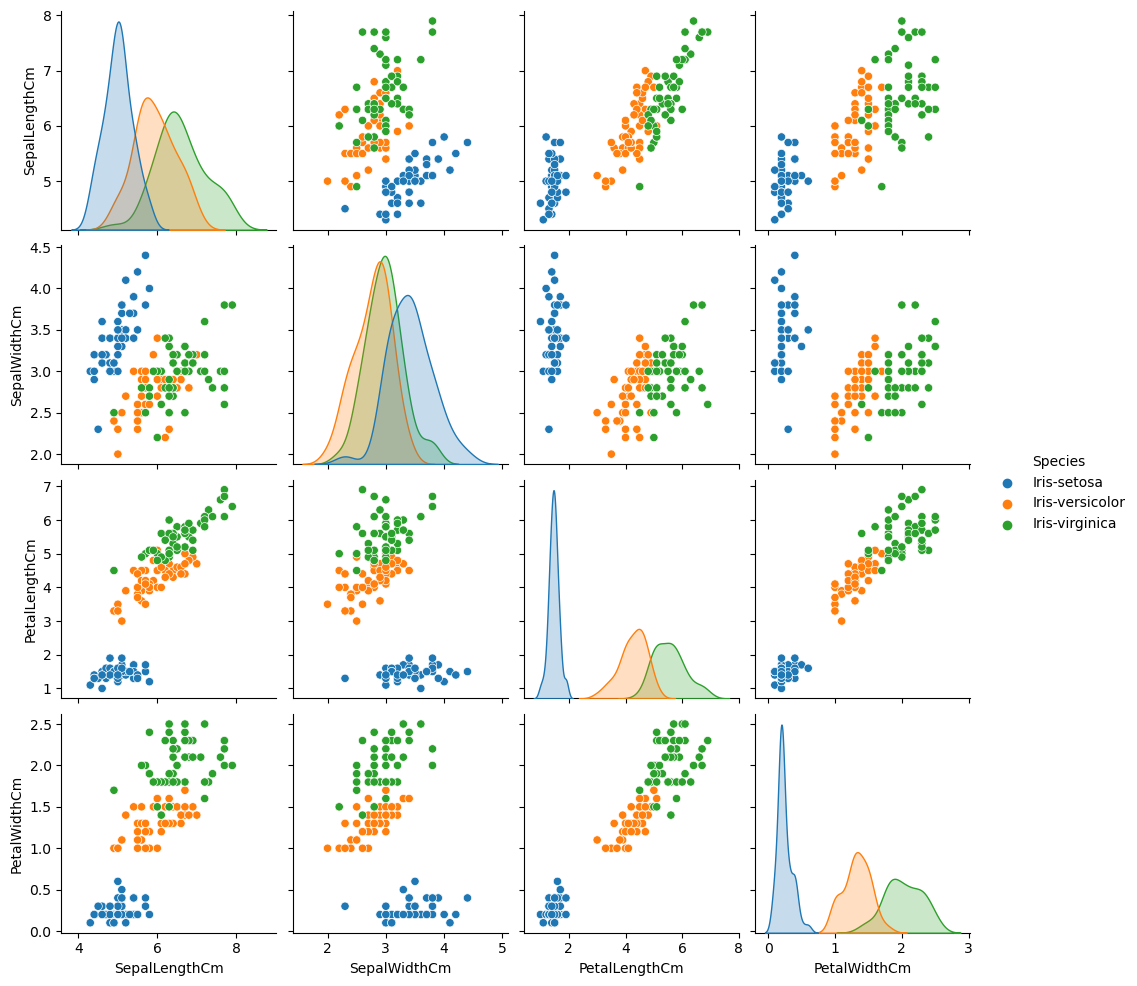

In [4]:
sns.pairplot(df, hue='Species')

<b>Observation</b>

It looks like I don't have to consider all 4 variables to build my model. I can consider either one of the following pair:
1. PetalLength and SepalLength
2. PetalLength and SepalWidth
3. PetalLength and PetalWidth
4. PetalWidth and SepalLength


## Data Preparation

In [5]:
y = df.Species
X = df.loc[:,['PetalWidthCm', 'SepalLengthCm']]

In [6]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [7]:
X.head()

PetalWidthCm  SepalLengthCm
0           0.2            5.1
1           0.2            4.9
2           0.2            4.7
3           0.2            4.6
4           0.2            5.0

In [8]:
# Data-preprocessing: Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [9]:
print(X_train.shape)

print(X_test.shape)

(112, 2)
(38, 2)


In [16]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)

print(X_train_transformed.shape)

(112, 2)


## Training

In [17]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [23]:
classifier.coef_

array([[-3.21497413, -0.9416383 ],
       [-0.08041937,  0.22807526],
       [ 3.29539349,  0.71356305]])

In [24]:
classifier.intercept_

array([-1.02928554,  1.49043229, -0.46114675])

In [18]:
y_train_pred = classifier.predict(X_train_transformed)

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_train_pred)

0.9553571428571429

## Prediction

In [20]:
X_test_transformed = scaler.transform(X_test)

In [21]:
y_test_pred = classifier.predict(X_test_transformed)

## Evaluation

In [22]:
# calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [13]:
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  1,  8]], dtype=int64)

In [14]:
classifier.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

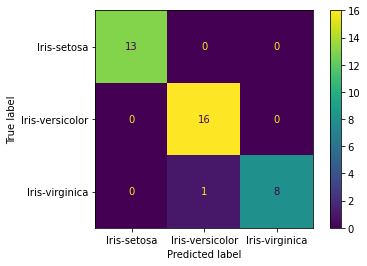

In [17]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = classifier.classes_)
disp.plot()

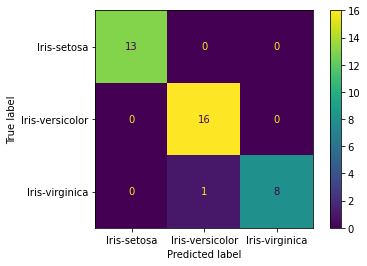

In [31]:
metrics.plot_confusion_matrix(classifier, X_test, y_test)

In [20]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [32]:
# # For ROC Curve
# metrics.plot_roc_curve(classifier, X_test, y_test)

In [34]:
classifier.predict(X_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [40]:
classifier.predict_proba(X_test)

array([[2.82390058e-05, 4.03551499e-02, 9.59616611e-01],
       [1.32521214e-01, 8.22672013e-01, 4.48067737e-02],
       [8.94211096e-01, 1.05662364e-01, 1.26540741e-04],
       [2.06930676e-04, 2.05106625e-01, 7.94686444e-01],
       [9.44250585e-01, 5.56989813e-02, 5.04341421e-05],
       [4.64967952e-06, 2.00232909e-02, 9.79972059e-01],
       [9.18390369e-01, 8.14948016e-02, 1.14829658e-04],
       [4.53559464e-03, 5.73715949e-01, 4.21748457e-01],
       [6.85459738e-03, 6.62286799e-01, 3.30858603e-01],
       [3.27287591e-02, 7.94772264e-01, 1.72498977e-01],
       [2.00527156e-02, 7.32535970e-01, 2.47411314e-01],
       [7.34227496e-03, 6.12154671e-01, 3.80503054e-01],
       [5.15624213e-02, 8.32345948e-01, 1.16091631e-01],
       [6.25878035e-03, 5.99603680e-01, 3.94137540e-01],
       [2.00527156e-02, 7.32535970e-01, 2.47411314e-01],
       [9.66983481e-01, 3.29983627e-02, 1.81566811e-05],
       [1.37753171e-02, 6.58803515e-01, 3.27421168e-01],
       [1.14779308e-01, 8.04951

In [43]:
np.around(classifier.predict_proba(X_test), 3)

array([[0.   , 0.04 , 0.96 ],
       [0.133, 0.823, 0.045],
       [0.894, 0.106, 0.   ],
       [0.   , 0.205, 0.795],
       [0.944, 0.056, 0.   ],
       [0.   , 0.02 , 0.98 ],
       [0.918, 0.081, 0.   ],
       [0.005, 0.574, 0.422],
       [0.007, 0.662, 0.331],
       [0.033, 0.795, 0.172],
       [0.02 , 0.733, 0.247],
       [0.007, 0.612, 0.381],
       [0.052, 0.832, 0.116],
       [0.006, 0.6  , 0.394],
       [0.02 , 0.733, 0.247],
       [0.967, 0.033, 0.   ],
       [0.014, 0.659, 0.327],
       [0.115, 0.805, 0.08 ],
       [0.937, 0.063, 0.   ],
       [0.811, 0.189, 0.001],
       [0.001, 0.216, 0.783],
       [0.025, 0.697, 0.277],
       [0.957, 0.043, 0.   ],
       [0.975, 0.025, 0.   ],
       [0.002, 0.323, 0.676],
       [0.967, 0.033, 0.   ],
       [0.867, 0.133, 0.   ],
       [0.028, 0.79 , 0.181],
       [0.385, 0.596, 0.019],
       [0.882, 0.118, 0.   ],
       [0.001, 0.299, 0.7  ],
       [0.034, 0.713, 0.253],
       [0.928, 0.072, 0.   ],
       [0.

In [44]:
y_pred_prob = classifier.predict_proba(X_test)
metrics.log_loss(y_test, y_pred_prob)

0.2684349322958612